In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 523, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'predict', 'track', 'val', 'export', 'benchmark', 'train'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'pose', 'detect', 'segment', 'obb', 'classify'}
                MODE (required) is one of {'predict', 'track', 'val', 'export', 'benchmark', 'train'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2xerwTYEFXEQQAnGEBah")
project = rf.workspace("school-doliz").project("foods-prkjq")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.1, to fix: `pip install ultralytics==8.0.196`


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=20 imgsz=640 batch=8 optimizer=NAdam lr0=0.000417 momentum=0.8

100% 21.5M/21.5M [00:00<00:00, 245MB/s]
Ultralytics YOLOv8.2.1 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Foods-2/data.yaml, epochs=20, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=NAdam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

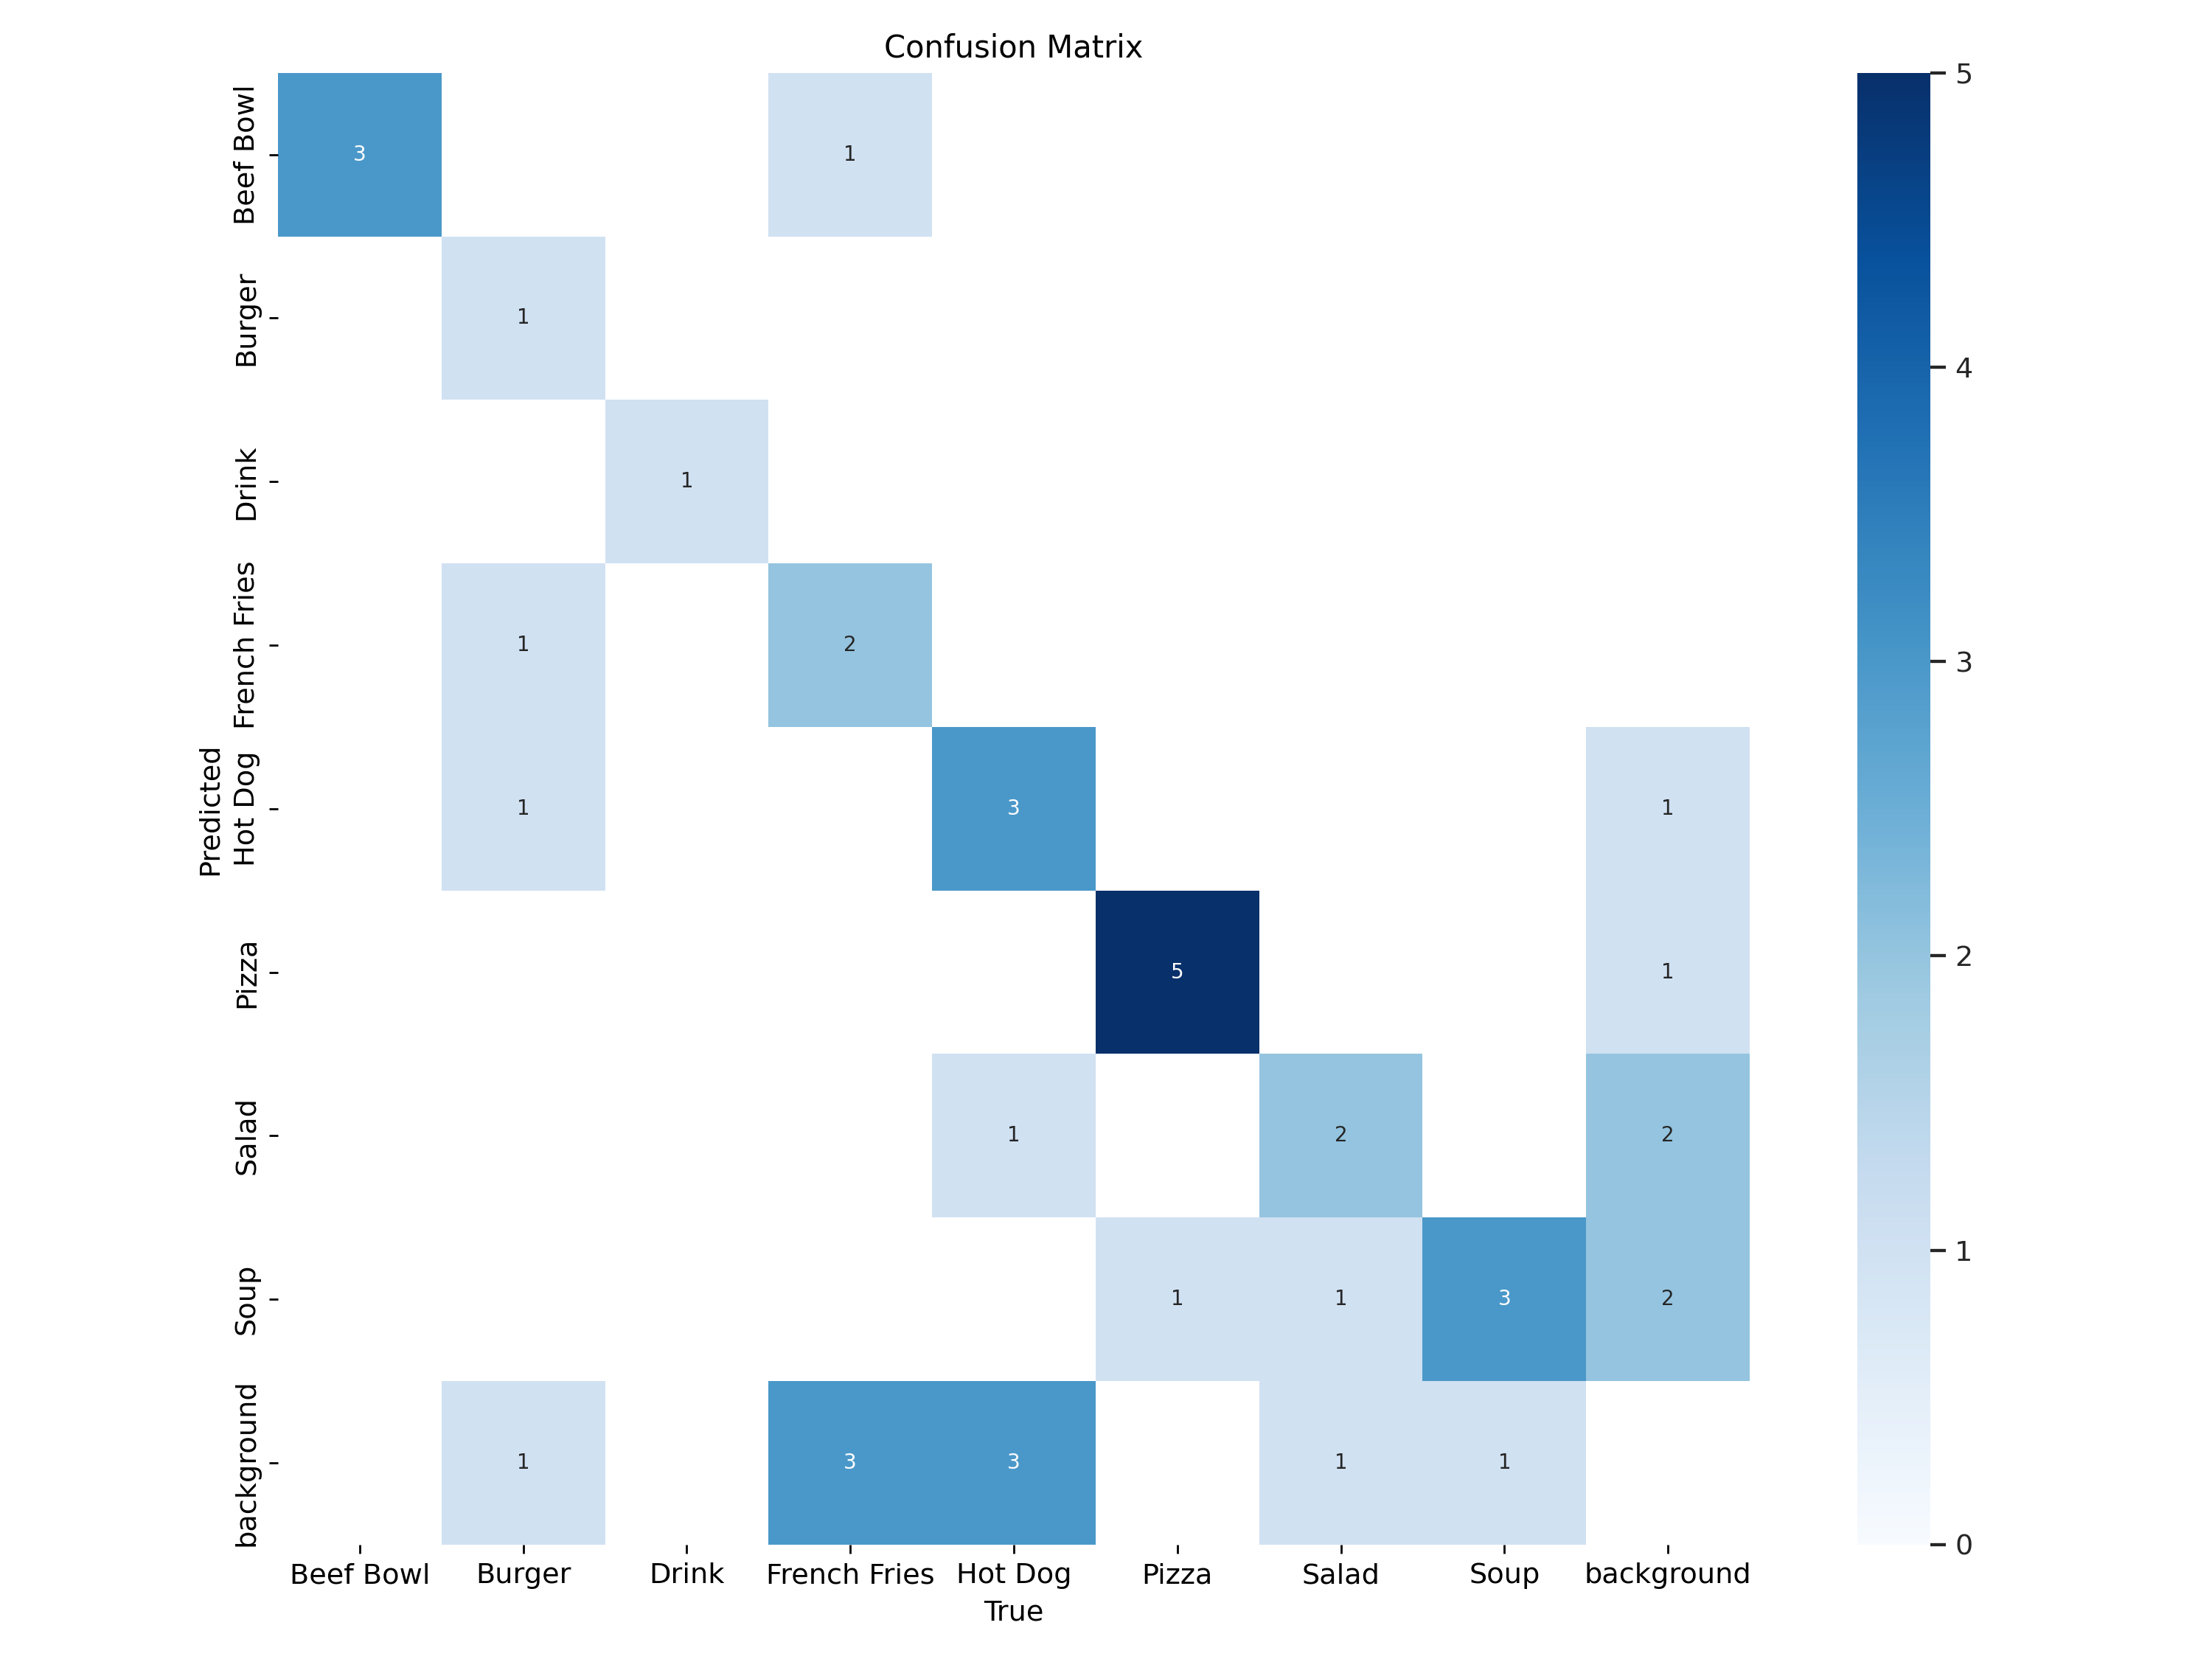

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

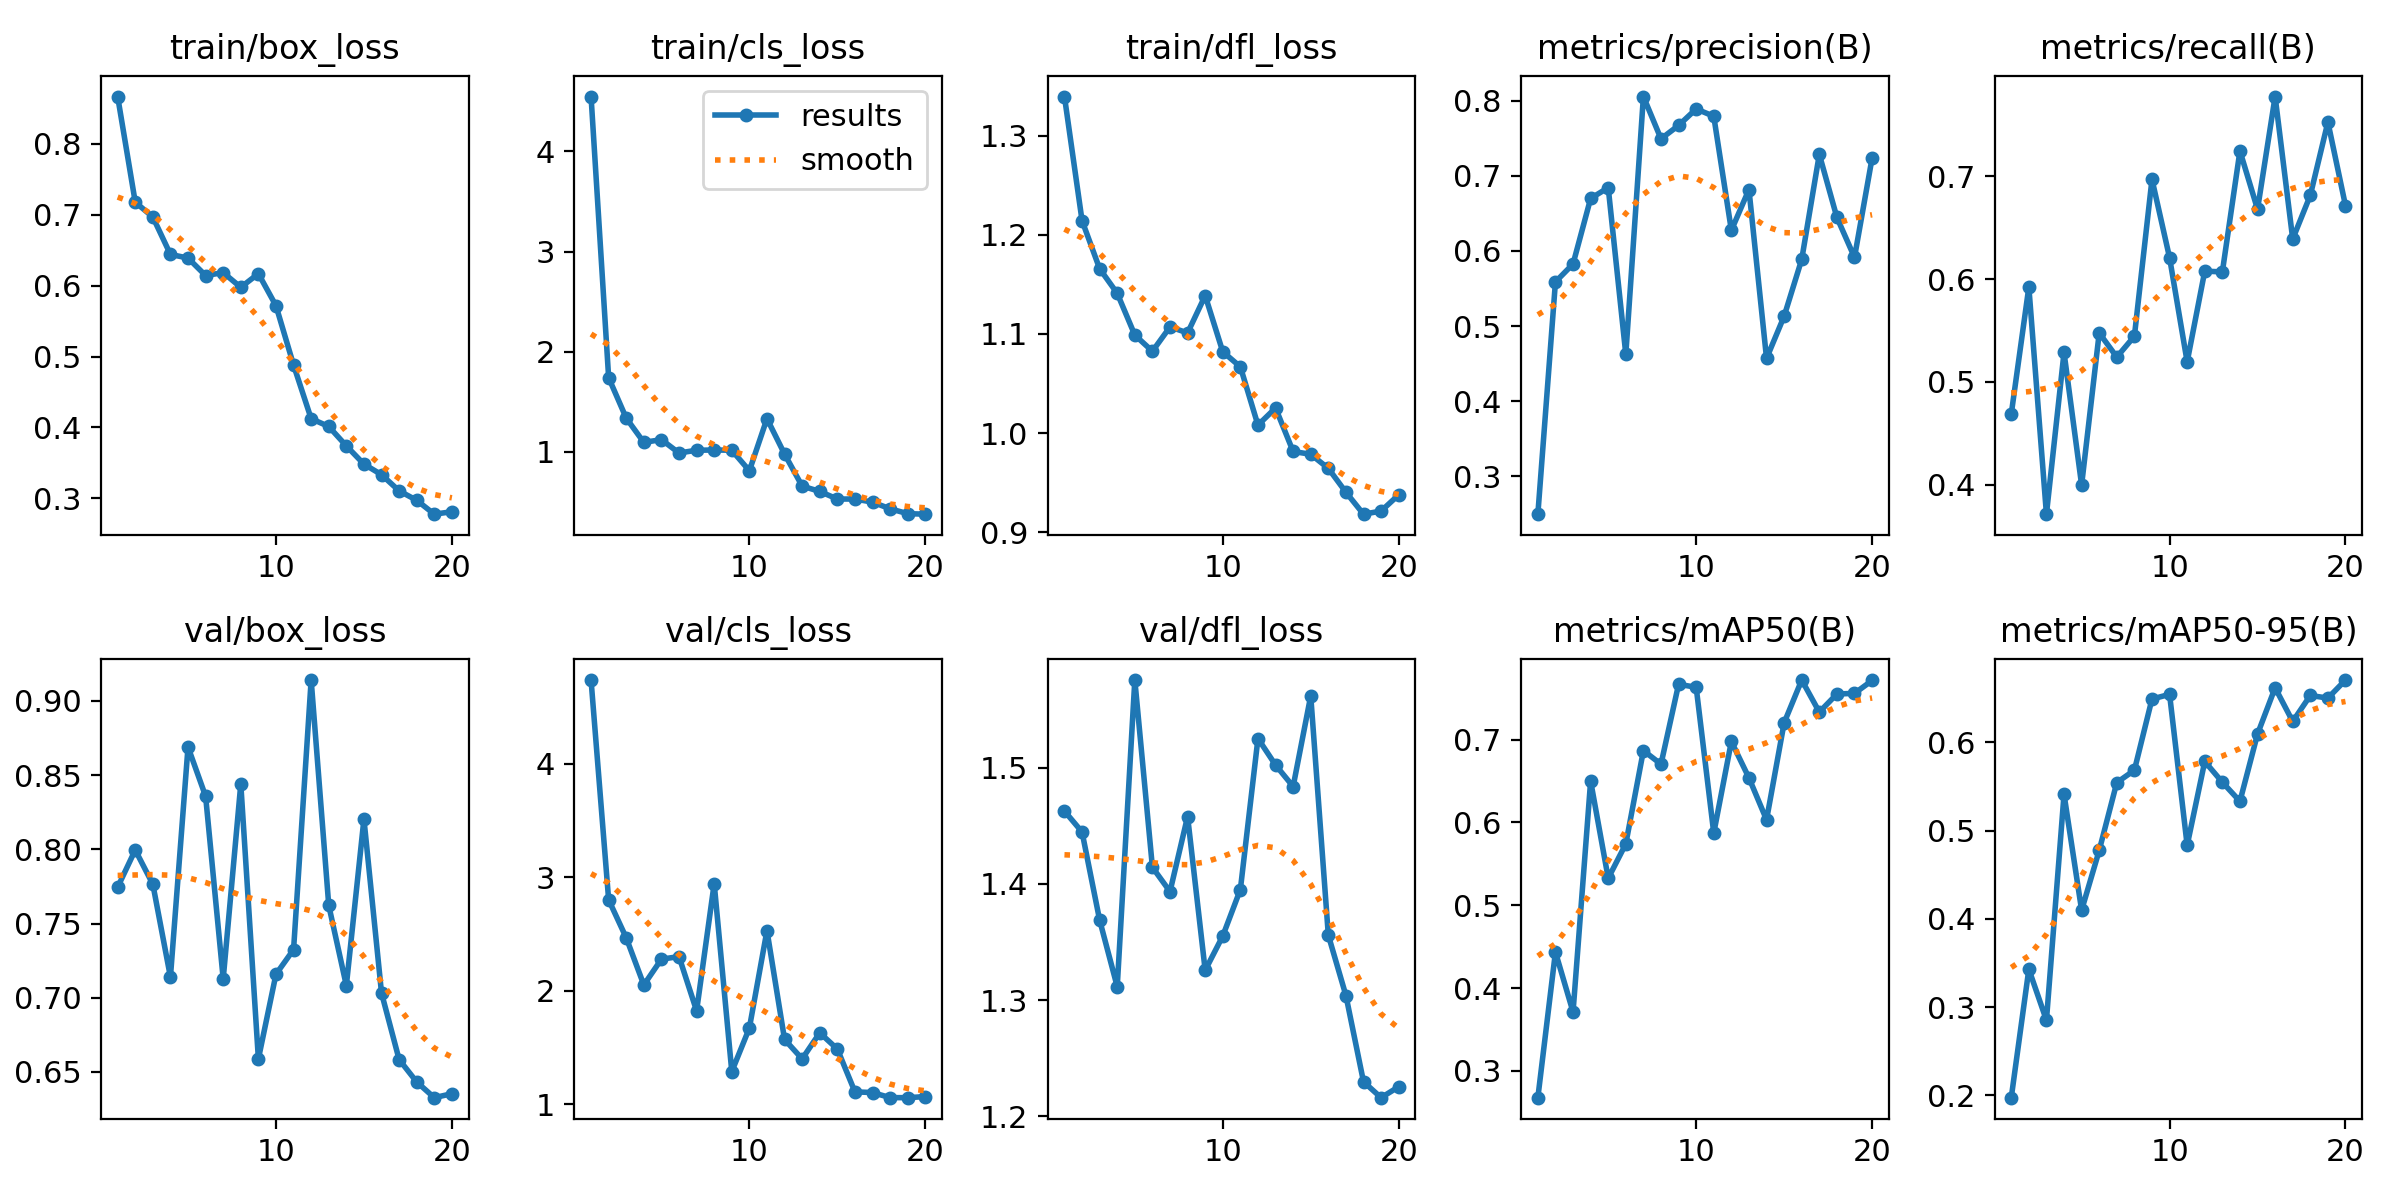

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.2.1 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/Foods-2/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:03<00:00,  1.98s/it]
                   all         20         35      0.724      0.671      0.772      0.668
             Beef Bowl         20          3      0.741          1      0.995      0.885
                Burger         20          4      0.919       0.25      0.711      0.498
                 Drink         20          1      0.759          1      0.995      0.995
          French Fries         20          6      0.629      0.296       0.48      0.393
               Hot Dog         20          7      0.744      0.419      0.574      0.365
                 Pizza         20          6      0.922  

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source={dataset. location}/test/images

Ultralytics YOLOv8.2.1 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs

image 1/10 /content/Foods-2/test/images/12419_jpg.rf.4ab14e5eef4630970c7a8200cad367c1.jpg: 640x640 1 Beef Bowl, 1 Soup, 16.0ms
image 2/10 /content/Foods-2/test/images/13492_jpg.rf.4389bcfaa30ee717932fe5ac35d79003.jpg: 640x640 1 Hot Dog, 16.0ms
image 3/10 /content/Foods-2/test/images/13497_jpg.rf.db798fe5a7d5aef59de5262ad1cde6cb.jpg: 640x640 1 Drink, 1 Hot Dog, 16.0ms
image 4/10 /content/Foods-2/test/images/13984_jpg.rf.6e8fba85b5841853dd9384127f48643e.jpg: 640x640 1 Pizza, 16.0ms
image 5/10 /content/Foods-2/test/images/15345_jpg.rf.77b3978605018404905370813c030510.jpg: 640x640 1 Burger, 1 French Fries, 16.0ms
image 6/10 /content/Foods-2/test/images/1605_jpg.rf.1eed258db45bb652b9d61c1e0ca00f8c.jpg: 640x640 (no detections), 16.0ms
image 7/10 /content/Foods-2/test/images/16283_jpg.rf.0826620cc843918b6eae4418c3307afc.jpg: 64

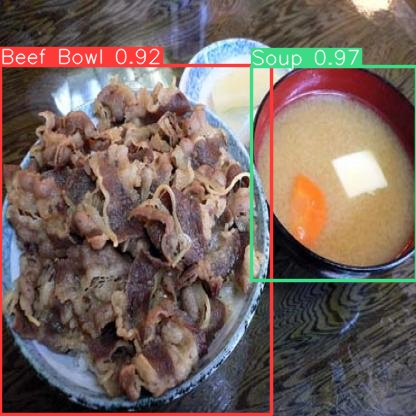

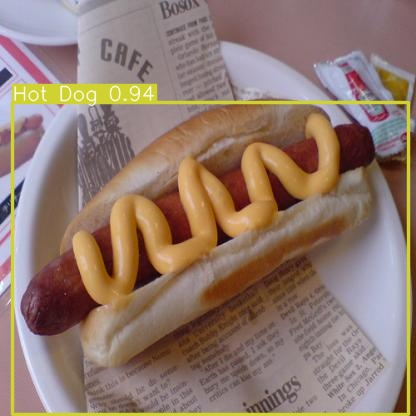

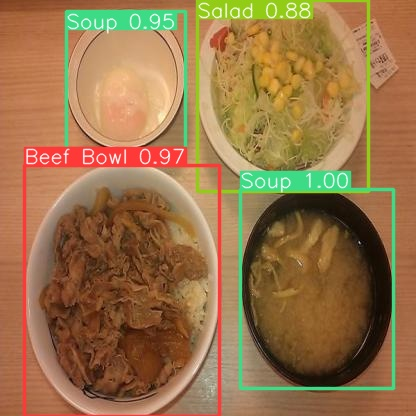

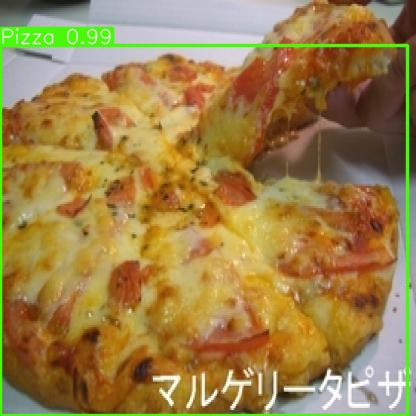

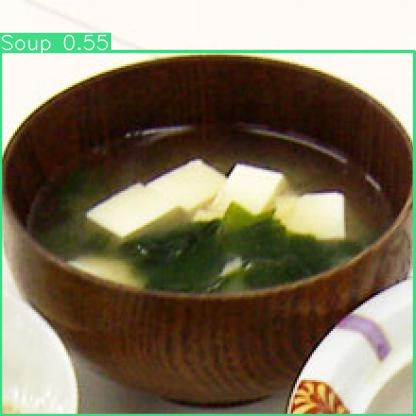

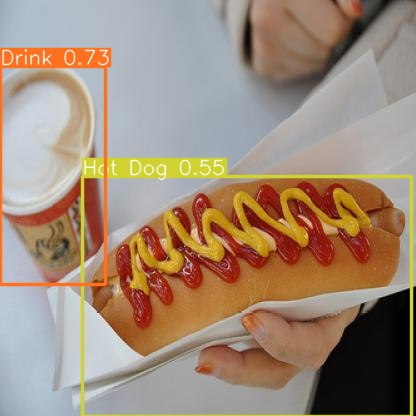

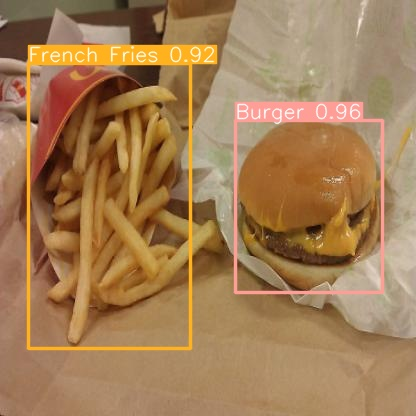

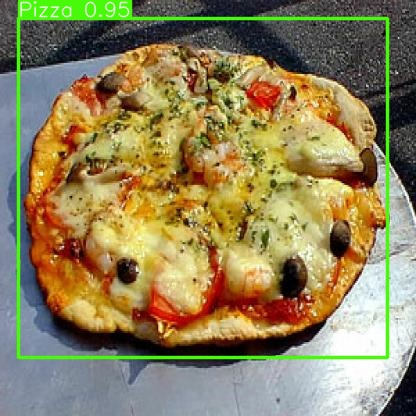

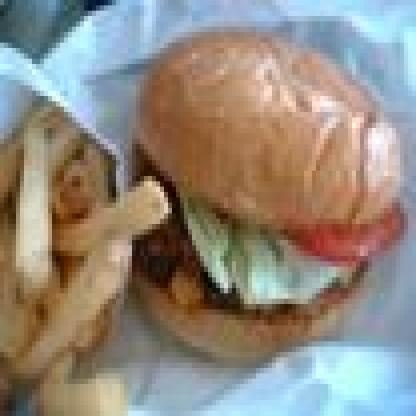

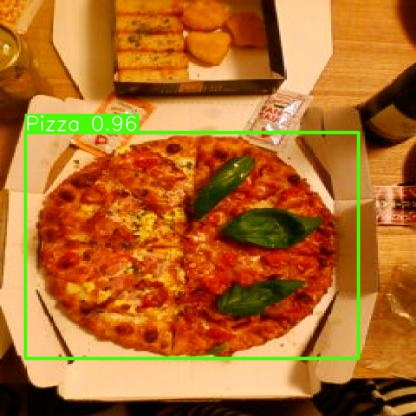

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/*.jpg'):
    display(Image(filename=image_path, height=600))
    print("\n")